# Pandas

[Pandas](http://pandas.pydata.org/) je biblioteka za analizu podataka. Ilustrirat ćemo njeno korištenje na jednostavnom primjeru analize podataka iz IMDB baze.

Koristit ću i biblioteke [requests](https://github.com/kennethreitz/requests) (za učitavanje web stranica) i [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) (za analizu HTML-a). 

In [4]:
import requests
from bs4 import BeautifulSoup as bs

Dohvaćamo podatke s IMDB-a o filmovima sa zemljom porijekla Hrvatska, smimljenim između 1945. i 2017.

In [117]:
import time
url = 'http://www.imdb.com/search/title'
params = dict(sort='num_votes,desc', start=1, title_type='feature', year='1945,2017',countries='hr', languages='hr')
r=[]
for i in range(1,240,50): # takvih filmova ima trenutno 201
    params['start']=i
    r.append(requests.get(url, params=params))
    time.sleep(10)

Parsiranje podataka koje spremamo u datoteku `filmovi2.txt`.

In [167]:
import re
with open('filmovi2.txt','w') as f:
    for i in range(len(r)):
        soup = bs(r[i].text,'html.parser')
        for film in soup.find_all('div', class_="lister-item"):
            for a in film.find_all('a', href=True):
                if '/title/tt'  and 'adv_li_tt' in a['href']:
                    title = a.contents[0]
            rt = film.find_all('span', class_="runtime")
            if rt:
                runtime =  rt[0].contents[0]
            else:
                runtime = '0 mins'
            y = film.find_all('span', class_="lister-item-year")
            if y: 
                year = y[0].contents[0]
                year = year.replace('(I)','').replace('(III)','').strip()
            else:
                year = '???'
            rat = film.find_all('span', class_='global-sprite rating-star imdb-rating')
            if rat:
                rating = str(list(rat[0].next_siblings)[1]).replace('<strong>','').replace('</strong>','')
            else:
                rat = '0'
            g = film.find_all('span',class_="genre")
            if g: genres =  ' '.join(g[0].contents).replace('\n','').strip()
            d=film.find_all(string =re.compile('Director'))[0]
            director = d.next_element.contents[0]
            f.write('\t'.join((title, year, runtime, rating,director, genres))+'\n')

In [119]:
!head filmovi2.txt

The Hunting Party	(2007)	101 min	6.9	Richard Shepard	Adventure, Comedy, Drama
Karaula	(2006)	94 min	7.7	Rajko Grlic	Action, Comedy, Drama
Svecenikova djeca	(2013)	96 min	6.8	Vinko Bresan	Comedy, Drama
Metastaze	(2009)	82 min	7.8	Branko Schmidt	Crime, Drama
Zvizdan	(2015)	123 min	7.3	Dalibor Matanic	Drama, Romance, War
How the War Started on My Island	(1996)	97 min	7.9	Vinko Bresan	Comedy, War
Ljudozder vegetarijanac	(2012)	85 min	7.2	Branko Schmidt	Drama
Fine mrtve djevojke	(2002)	77 min	7.2	Dalibor Matanic	Drama, Thriller
Sonja i bik	(2012)	103 min	7.1	Vlatka Vorkapic	Comedy, Romance
Petelinji zajtrk	(2007)	124 min	7.6	Marko Nabersnik	Drama


### Analiza podataka pomoću biblioteke Pandas

In [174]:
import pandas as pd
names = ['title', 'year','runtime', 'rating', 'director', 'genres']
data = pd.read_csv('filmovi2.txt', delimiter='\t', names=names)
print ("Number of rows: {:d}".format(data.shape[0]))
data.head()

Number of rows: 201


,title,year,runtime,rating,director,genres
0,The Hunting Party,(2007),101 min,6.9,Richard Shepard,"Adventure, Comedy, Drama"
1,Karaula,(2006),94 min,7.7,Rajko Grlic,"Action, Comedy, Drama"
2,Svecenikova djeca,(2013),96 min,6.8,Vinko Bresan,"Comedy, Drama"
3,Metastaze,(2009),82 min,7.8,Branko Schmidt,"Crime, Drama"
4,Zvizdan,(2015),123 min,7.3,Dalibor Matanic,"Drama, Romance, War"


In [175]:
# data['runtime'].fillna('0 mins.', inplace=True);
clean_runtime = [int(v.split(' ')[0]) for v in data.runtime]
data['runtime'] = clean_runtime
data['year'] = [int(y[1:-1]) for y in data.year]
# data.rating[data.rating=='-'] = '0';
clean_rating = [float(v) for v in data.rating]
data['rating'] = clean_rating
#clean_genres = [g.replace(' ','|') for g in data.genres]
#data['genres'] = clean_genres
data.head()

,title,year,runtime,rating,director,genres
0,The Hunting Party,2007,101,6.9,Richard Shepard,"Adventure, Comedy, Drama"
1,Karaula,2006,94,7.7,Rajko Grlic,"Action, Comedy, Drama"
2,Svecenikova djeca,2013,96,6.8,Vinko Bresan,"Comedy, Drama"
3,Metastaze,2009,82,7.8,Branko Schmidt,"Crime, Drama"
4,Zvizdan,2015,123,7.3,Dalibor Matanic,"Drama, Romance, War"


In [176]:
data.ix[118]

title       Doktor ludosti
year                  2003
runtime                  0
rating                   7
director      Fadil Hadzic
genres              Comedy
Name: 118, dtype: object

In [177]:
data[['year','runtime', 'rating']].describe()

,year,runtime,rating
count,201.000000,201.000000,201.000000
mean,2007.935323,85.029851,7.131841
std,7.379078,29.859489,0.866534
min,1970.000000,0.000000,3.700000
25%,2004.000000,78.000000,6.700000
50%,2010.000000,90.000000,7.200000
75%,2013.000000,100.000000,7.600000
max,2017.000000,200.000000,9.600000


In [217]:
import numpy as np
data.replace(0,np.nan, inplace=True);

In [218]:
data[['runtime', 'rating']].describe()

,runtime,rating
count,186.000000,201.000000
mean,91.887097,7.131841
std,18.176407,0.866534
min,46.000000,3.700000
25%,80.250000,6.700000
50%,91.500000,7.200000
75%,100.000000,7.600000
max,200.000000,9.600000


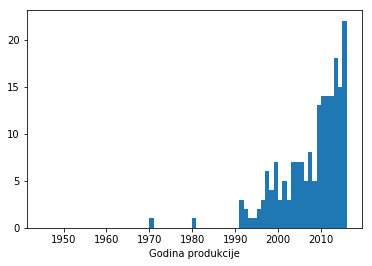

In [219]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data.year, bins=np.arange(1945, 2017))
plt.xlabel("Godina produkcije");

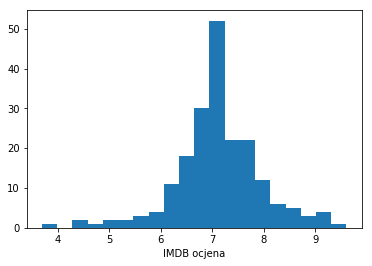

In [220]:
plt.hist(data.rating.dropna(), bins=20)
plt.xlabel("IMDB ocjena");

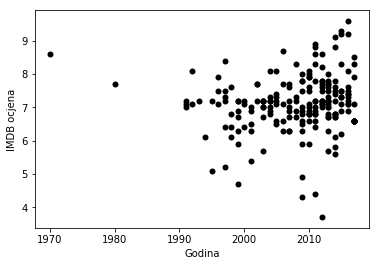

In [222]:
plt.scatter(data.year, data.rating, lw=0, color='k')
plt.xlabel("Godina")
plt.ylabel("IMDB ocjena");

In [223]:
data[data.rating == data.rating.min()][['title', 'year', 'rating','director', 'genres']]

,title,year,rating,director,genres
83,Larin izbor: Izgubljeni princ,2012,3.7,Tomislav Rukavina,Drama


In [224]:
data[data.rating == data.rating.max()][['title', 'year', 'rating','director',  'genres']]

,title,year,rating,director,genres
189,The Second Death of Maximilian Paspa Aka Paspi...,2016,9.6,Zorko Sirotic,Mystery


In [225]:
genres = set()
for m in data.genres:
    genres.update(g for g in m.split(','))
genres = sorted(genres)

for genre in genres:
    data[genre] = [genre in movie.split(',') for movie in data.genres]
         
data.head()

,title,year,runtime,rating,director,genres,Adventure,Comedy,Crime,Drama,...,Biography,Comedy,Crime,Drama,Family,Fantasy,Horror,Mystery,Thriller,War
0,The Hunting Party,2007,101.0,6.9,Richard Shepard,"Adventure, Comedy, Drama",False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,Karaula,2006,94.0,7.7,Rajko Grlic,"Action, Comedy, Drama",False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Svecenikova djeca,2013,96.0,6.8,Vinko Bresan,"Comedy, Drama",False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,Metastaze,2009,82.0,7.8,Branko Schmidt,"Crime, Drama",False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,Zvizdan,2015,123.0,7.3,Dalibor Matanic,"Drama, Romance, War",False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [226]:
genre_count = data[genres].sum()
pd.DataFrame({'Genre Count': genre_count})

,Genre Count
Adventure,2
Comedy,7
Crime,4
Drama,43
Family,9
Fantasy,2
History,5
Horror,2
Music,2
Musical,1


In [227]:
petoljetka =  (data.year // 5) * 5

tyd = data.loc[:, ('title', 'year')]
tyd['petoljetka'] = petoljetka;

tyd.head()

,title,year,petoljetka
0,The Hunting Party,2007,2005
1,Karaula,2006,2005
2,Svecenikova djeca,2013,2010
3,Metastaze,2009,2005
4,Zvizdan,2015,2015


year
1970    8.600000
1980    7.700000
1990    7.114286
1995    6.754545
2000    6.956000
2005    6.973684
2010    7.193333
2015    7.512500
Name: Petoljetka mean, dtype: float64


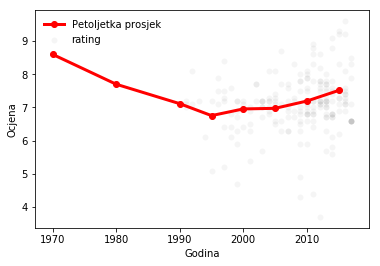

In [228]:
pet_mean = data.groupby(petoljetka).rating.mean()
pet_mean.name = 'Petoljetka mean'
print (pet_mean)

plt.plot(pet_mean.index, pet_mean.values, 'o-',
        color='r', lw=3, label='Petoljetka prosjek')
plt.scatter(data.year, data.rating, alpha=.04, lw=0, color='k')
plt.xlabel("Godina")
plt.ylabel("Ocjena")
plt.legend(frameon=False);

In [229]:
for year, subset in data.groupby('year'):
    print (year, subset[subset.rating == subset.rating.max()].title.values)

1970 ['Tko pjeva zlo ne misli']
1980 ['Izgubljeni zavicaj']
1991 ['Vrijeme ratnika']
1992 ['Kamenita vrata']
1993 ['Kontesa Dora']
1994 ['Vukovar se vraca kuci']
1995 ['Washed Out']
1996 ['How the War Started on My Island']
1997 ['Pont Neuf']
1998 ['Kad mrtvi zapjevaju']
1999 ['Marsal' 'Dubrovacki suton']
2000 ['Je li jasno prijatelju?']
2001 ['Holding']
2002 ['24 sata' 'Serafin, svjetionicarev sin']
2003 ['Konjanik' 'Tu' 'Bore Lee: U kandzama velegrada']
2004 ['Nije bed']
2005 ['RGB: RedGreenBlue']
2006 ['Crveno i crno']
2007 ['Pjevajte nesto ljubavno']
2008 ['Blazeni Augustin Kazotic']
2009 ['Da mogu...']
2010 ['Mjesto na kojem je umro posljednji covjek']
2011 ["Marija's Own"]
2012 ["Once Upon a Winter's Night"]
2013 ['Glazbena kutija']
2014 ['Vlog']
2015 ['Oporuka']
2016 ['The Second Death of Maximilian Paspa Aka Paspin Kut3']
2017 ['Uzbuna na Zelenom Vrhu']


In [230]:
from verzije import *
from IPython.display import HTML
HTML(print_sysinfo()+info_packages('pandas, numpy,requests, beautifulsoup4'))

Python verzija,3.5.3
kompajler,GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
sustav,Linux
broj CPU-a,8
interpreter,64bit
pandas verzija,0.19.2
numpy verzija,1.11.3
requests verzija,2.13.0
beautifulsoup4 verzija,4.5.3
